# MODELO PREDICTIVO DE REGRESIÓN LOGISTICA

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

# Primer punto

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

Primero cargamos las librerias necesarias 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Cargamos el archivo

In [2]:
Datos = pd.read_csv('./Enfermedad_Cardiaca.csv')

Abrimos el archivo para la lectura y realizar para el análisis exploratorio

In [3]:
Datos.head(50)

,edad,sexo,tipoDolorPecho,presionArterialReposo,colesterolSerico,glucosaAyunas,resultadosEcgReposo,ritmoCardiacoMaximo,anginaInducidaEjercicio,depresionStEjercicio,pendienteStEjercicio,numVasosColoreados,resultadoThal,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Descripción de los datos

In [4]:
Datos.describe()

,edad,sexo,tipoDolorPecho,presionArterialReposo,colesterolSerico,glucosaAyunas,resultadosEcgReposo,ritmoCardiacoMaximo,anginaInducidaEjercicio,depresionStEjercicio,pendienteStEjercicio,numVasosColoreados,resultadoThal,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Exploración de variables numéricas, se realizan histogramas para todas las variables numéricas

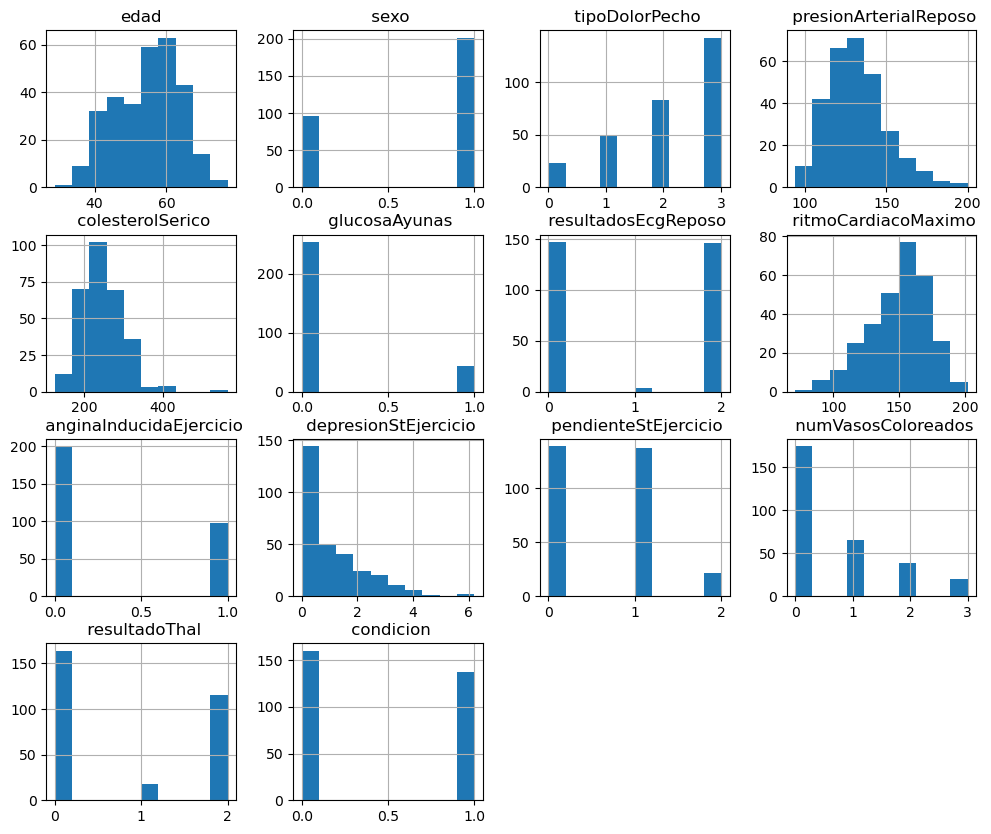

In [5]:
Datos.hist(figsize=(12, 10))
plt.show()

Diagrama de caja para visualizar valores atípicos

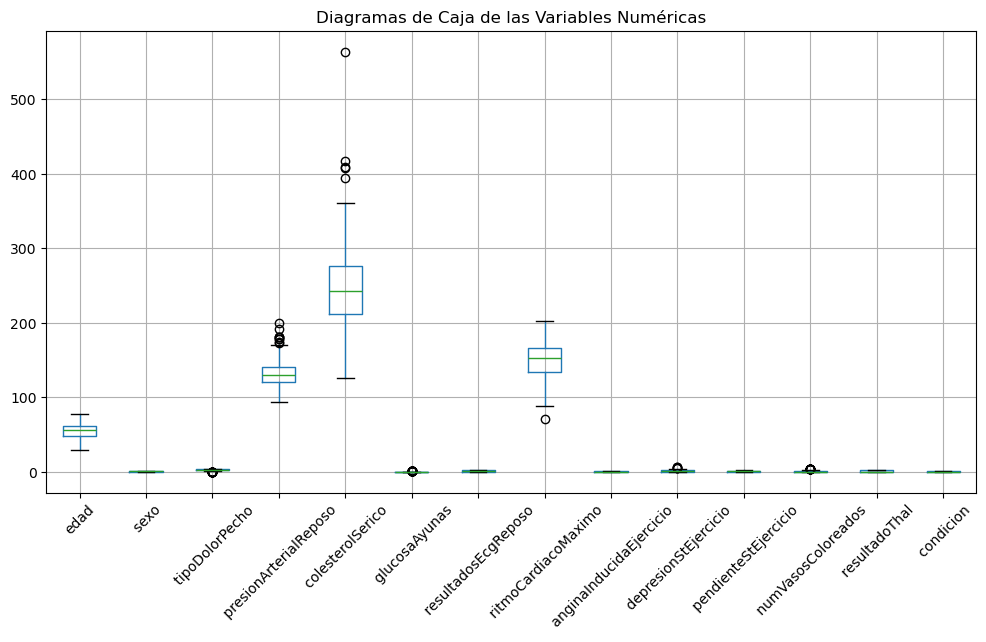

In [6]:
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas para el análisis de valores atípicos
columnas_numericas = Datos.select_dtypes(include=['int64', 'float64']).columns

# Graficar diagramas de caja para cada columna numérica
plt.figure(figsize=(12, 6))
Datos[columnas_numericas].boxplot()
plt.xticks(rotation=45)
plt.title('Diagramas de Caja de las Variables Numéricas')
plt.show()

# Segundo punto

Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
    
Vamos a verificar si hay valores faltantes

In [7]:
print(Datos.isnull().sum())

edad                        0
 sexo                       0
 tipoDolorPecho             0
 presionArterialReposo      0
 colesterolSerico           0
 glucosaAyunas              0
 resultadosEcgReposo        0
 ritmoCardiacoMaximo        0
 anginaInducidaEjercicio    0
 depresionStEjercicio       0
 pendienteStEjercicio       0
 numVasosColoreados         0
 resultadoThal              0
 condicion                  0
dtype: int64


Conteo de valores atípicos en cada característica:

In [8]:
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (Datos < lower_bound) | (Datos > upper_bound)

outliers_count = outliers.sum()

print(outliers_count)

edad                         0
 sexo                        0
 tipoDolorPecho             23
 presionArterialReposo       9
 colesterolSerico            5
 glucosaAyunas              43
 resultadosEcgReposo         0
 ritmoCardiacoMaximo         1
 anginaInducidaEjercicio     0
 depresionStEjercicio        5
 pendienteStEjercicio        0
 numVasosColoreados         20
 resultadoThal               0
 condicion                   0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

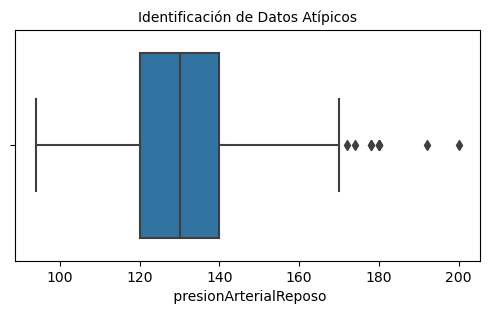

In [10]:
Datos = pd.read_csv('./Enfermedad_Cardiaca.csv')
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos[' presionArterialReposo'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )


In [11]:
#Conteo de Datos Atípicos

nivel_minimo=90
nivel_maximo=170
Total_Atipicos=((Datos[' presionArterialReposo']<nivel_minimo)|(Datos[' presionArterialReposo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [13]:
# Filtra Datos Atípicos

Datos=Datos[(Datos[' presionArterialReposo']<nivel_maximo)&(Datos[' presionArterialReposo']>nivel_minimo)]

In [14]:
Total_Atipicos=((Datos[' presionArterialReposo']<nivel_minimo)|(Datos[' presionArterialReposo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

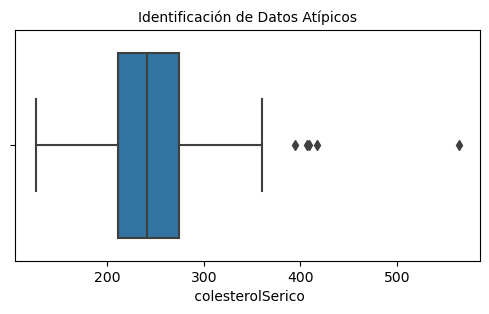

In [15]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos[' colesterolSerico'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [16]:
#Conteo de Datos Atípicos

nivel_minimo=126
nivel_maximo=360
Total_Atipicos=((Datos[' colesterolSerico']<nivel_minimo)|(Datos[' colesterolSerico']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [17]:
# Filtra Datos Atípicos

Datos=Datos[(Datos[' colesterolSerico']<nivel_maximo)&(Datos[' colesterolSerico']>nivel_minimo)]

In [18]:
Total_Atipicos=((Datos[' colesterolSerico']<nivel_minimo)|(Datos[' colesterolSerico']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

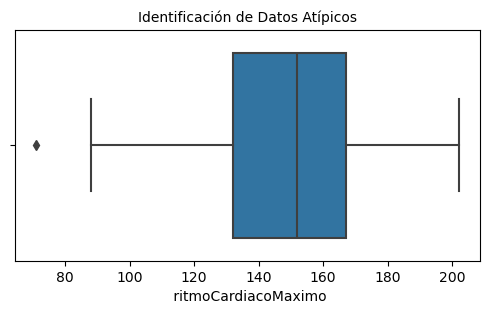

In [19]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos[' ritmoCardiacoMaximo'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [22]:
#Conteo de Datos Atípicos

nivel_minimo=87
nivel_maximo=210
Total_Atipicos=((Datos[' ritmoCardiacoMaximo']<nivel_minimo)|(Datos[' ritmoCardiacoMaximo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [23]:
# Filtra Datos Atípicos

Datos=Datos[(Datos[' ritmoCardiacoMaximo']<nivel_maximo)&(Datos[' ritmoCardiacoMaximo']>nivel_minimo)]

In [24]:
Total_Atipicos=((Datos[' ritmoCardiacoMaximo']<nivel_minimo)|(Datos[' ritmoCardiacoMaximo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [25]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      276 non-null    int64  
 1    sexo                     276 non-null    int64  
 2    tipoDolorPecho           276 non-null    int64  
 3    presionArterialReposo    276 non-null    int64  
 4    colesterolSerico         276 non-null    int64  
 5    glucosaAyunas            276 non-null    int64  
 6    resultadosEcgReposo      276 non-null    int64  
 7    ritmoCardiacoMaximo      276 non-null    int64  
 8    anginaInducidaEjercicio  276 non-null    int64  
 9    depresionStEjercicio     276 non-null    float64
 10   pendienteStEjercicio     276 non-null    int64  
 11   numVasosColoreados       276 non-null    int64  
 12   resultadoThal            276 non-null    int64  
 13   condicion                276 non-null    int64  
dtypes: float64(1), 

# Tercer punto

Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
La variable objetivo es la presencia de enfermedad cardíaca.

Verificamos el total de personas con presencia de enfermedad cardiaca

In [27]:
Datos[' condicion'].value_counts()

 condicion
0    151
1    125
Name: count, dtype: int64

In [29]:
Datos[[' condicion']].head(40)

,condicion
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


# Cuarto punto

Dividir el dataset en Train y Test para evaluar correctamente el modelo.

Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

Se crean variables X y Y para almacenar la información del entrenamiento

In [32]:
X = Datos.drop(' condicion',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos[' condicion'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [33]:
print (X_train)

     edad   sexo   tipoDolorPecho   presionArterialReposo   colesterolSerico  \
274    46      1                3                     120                249   
27     63      0                1                     140                195   
4      64      1                0                     110                211   
95     60      0                2                     120                178   
127    50      1                2                     129                196   
..    ...    ...              ...                     ...                ...   
130    48      0                2                     130                275   
195    61      0                3                     130                330   
17     51      1                0                     125                213   
292    40      1                3                     152                223   
8      60      0                0                     150                240   

      glucosaAyunas   resultadosEcgRepo

In [34]:
print (Y_train)

274    1
27     0
4      0
95     0
127    0
      ..
130    0
195    1
17     0
292    1
8      0
Name:  condicion, Length: 207, dtype: int64


# Quinto punto

Entrenar el modelo configurando los diferentes hiperparámetros.

In [36]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [37]:
print (Y_test)

187    1
197    1
18     1
91     1
80     1
      ..
133    1
225    1
207    0
41     0
23     0
Name:  condicion, Length: 69, dtype: int64


In [38]:
print (Prediccion)

[1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0]


# Sexto punto

Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [40]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.90      0.87      0.89        31

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



# Séptimo punto

Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

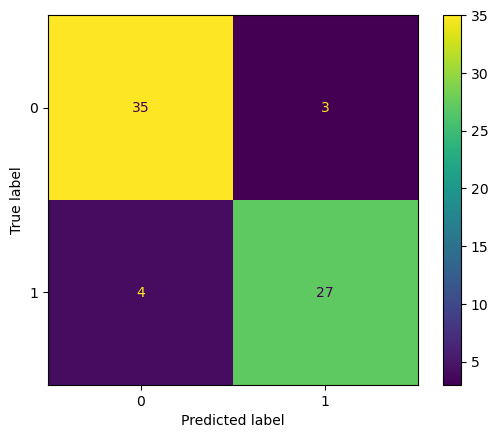

In [41]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

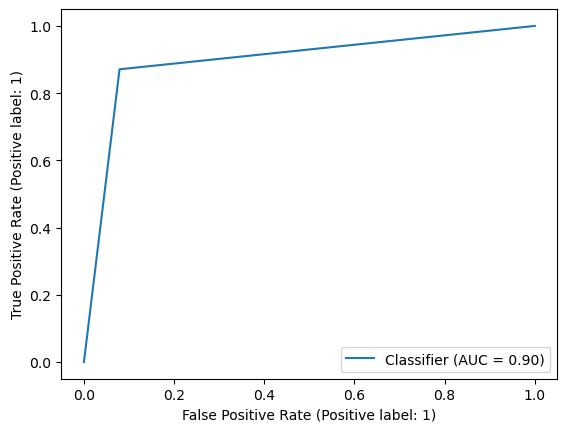

In [43]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

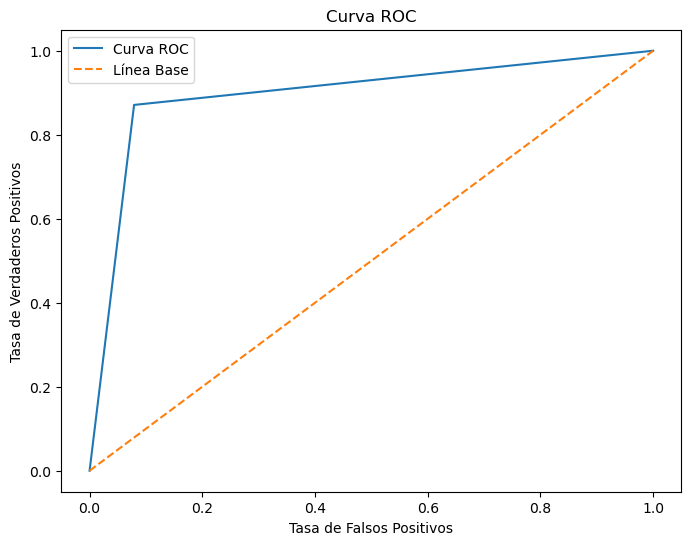

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve

# Curva ROC
fpr, tpr, _ = roc_curve(Y_test, Prediccion)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Línea Base')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

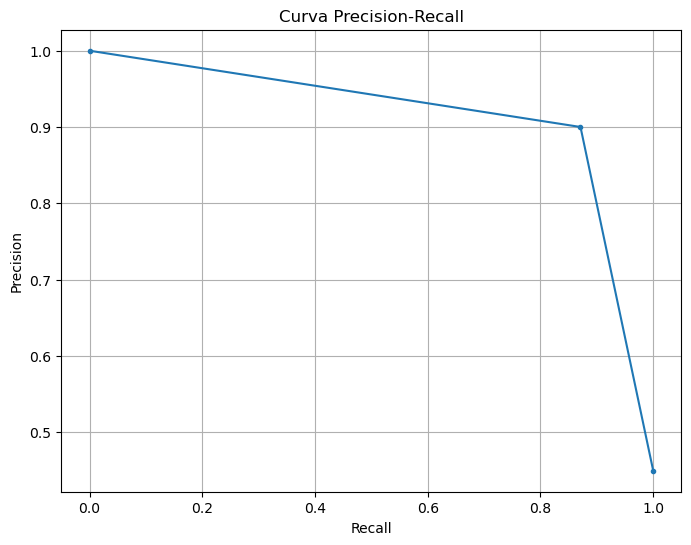

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Y_test, Prediccion)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

# Octavo punto

INTERPRETACIÓN, ANÁLISIS Y DOCUMENTACIÓN DE RESULTADOS OBTENIDOS

En el desarrollo de este modelo predictivo de regresión logistica se ha tenido en cuenta un dataset el cual nos enseña diferentes variables las cuales nos indican en que situación se encuentran cada una de las personas registradas quienes presentan o no una enfermedad cardiaca.

Lo primero que se realiza al iniciar este proceso haciendo uso del lenguaje de programación python, es cargar las librerias necesarias oara manejo y análsiis de estructuras de datos, análisis de datos, calculos numericos, regresión logistica y demás librerias necesarias para implementar modelos de ciencia de datos.

ANALISIS EXPLORATORIO DE DATOS

Seguidamente se procede al cargue del dataset en nuestro entorno de trabajo Jupiter notebook y en este caso se ha optado por cambiar los nombres a español de los encabezados o lo que vendrian siendo las variables, luego se procede a realizar la lectura para el desarrollo del primer punto de análisis exploratorio de datos, en este punto solo se muestra la lectura de los primeros 50 registros para verificar que todo se haya cargado correctamente. De igual manera, se realiza el proceso de descripción de datos con el fin de empezar a identificar algunos datos atípicos, pues se nos muestra que tenemos un total de 296 registros, y también se logra visualizar factores importantes como datos max y min de cada variable.

Se ha realizado la exploración de variables numéricas haciendo uso de histogramas, en donde de ha podido notar que casi un 75% de los registros son pertenecientes al genero masculino. También se puede notar que un poco más de la mitad de los registros indican que las personas no tiene la presencia de enfermedad cardíaca, aunque si es un poco preocupante porque estamos habalando tambien de que casi la mitad de registros son de personas que si tienen esta enfermedad, por ende se debe tener en cuenta el resto de variables como presion arterial, colesterol, glucosa, ritmo cardiaco, etc.

Como anteriormente se habia realizado el ejercicio de EDA en el software Knime, donde aprendimos que el mejor diagrama para indentificar valores atipicos era el digrama de caja, se procede a hacer uso de este, pero una de las ventajas del uso de python es que podemoos realizar ese diagrama a nivel general, es decir que nos muestre en unsa sola imagen los digramas de cajas que representan cada variable. 

PRE-PROCESAMIENTO DE DATOS

Luego, se realiza el segundo punto de esta actividad el cual corresponde a preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. Para el desarrollo de esta parte de ha verificado si hay valores faltantes pero dimos con la suerte de que este dataset no tiene valores faltantes. Ahora, se solicita mediante código que nos muestre un consolidado de cuantos valores atipicos tiene cada una de las variables y nos ha mostrado que existen valores atipicos en las variables:

* tipo_dolor_pecho
* presion_arterial_reposo
* colesterol_serico
* glucosa_ayunas
* ritmo_cardiaco_maximo
* depresion_st_ejercicio
* num_vasos_coloreados

Como se puede notar, el sistema nos arroja que tenemos datos atípicos en varias variables, pero aqui viene algo muy importante y es tener en cuenta la información que nos brindan en la página Kaggle donde se descargó el dataset, ya que las variables tipo_dolor_pecho, glucosa_ayunas, depresion_st_ejercicio y num_vasos_coloreados, corresponden a un registro que es resultado de la selección de opciones, por ejemplo el tipo_dolor_pecho se encuentran las opciones:

Valor 0: angina típica.
Valor 1: angina atípica.
Valor 2: dolor no anginal.
Valor 3: asintomátic
De este modo se han seleccionado las siguientes variables las cuales no dependen de unas opciones y por ende se debe proceder a realizar una limpieza 
o.

* presion_arterial_reposo
* colesterol_serico
* ritmo_cardiaco_max

Entonces en este punto procedemos a graficar especificamente un diagrama por cada variable y realizamos un filtro para remover aquellos valores atípicos, ya por último en este paso se hace una revisión donde se han eliminado ciertos registros, pues de 296 que habian, nos quedaron 276.

SELECCION DE CARACTERISTICAS RELEVANTES PARA ENTRENAR EL MODELO

Dando continidad al este proceso, en el tercer punto seleccionan las características más relevantes para entrenar el modelo, pues la variable objetivo es la condición o lo que corresponde a presencia de enfermedad cardiaca, entonces se procede a identificar exactamente cuantas personas tienen o no enfermedad cardica. Estos han sido los resultados:

Presencia de enfermedad cardiaca: 125
No presencia de enfermedad cardiaca: 151

TRAIN Y TEST

En el cuarto punto el objetivo es dividir el dataset en Train y Test, en otras palabras se repartiran los registros, un parte para entrenar correspondiente al 75% del dataset y la otra para pruebas correspondiente al 25%.

ENTRENAMIENTO DEL MODELO

En el quinto punto empezamos algo muy interesante y es el entrenamiento del modelo configurando diferentes hiperparámetros, enttonces se inicia con el uso de la libreria  scikit-learn para construir un modelo de regresión logística. Primero, se instancia un objeto de regresión logística con el algoritmo liblinear, diseñado para problemas lineales de clasificación. Luego, se ajusta el modelo a los datos de entrenamiento para encontrar los parámetros óptimos que minimizan la función de costo. Una vez ajustado el modelo, se utiliza para predecir las etiquetas de clasificación para el conjunto de datos de validación. Este proceso permite clasificar nuevos datos en función de las características de entrada proporcionadas

Seguidamente hacemos un print a Y_test lo cual nos muestra la serie de números, cada uno representa la condición de salud de un individuo en el conjunto de datos de prueba. Este conjunto de valores es crucial para evaluar la precisión del modelo de clasificación, ya que nos permite comparar las predicciones del modelo con las condiciones de salud reales y determinar cuán bien está funcionando el modelo en la tarea de identificar la presencia o ausencia de enfermedades cardiacas. De igual manera se hace un print (Prediccion) para evaluar la eficacia del modelo en la tarea de clasificación, ya que nos permiten comparar las predicciones del modelo con las condiciones de salud reales y determinar su precisión en la identificación de las enfermedades cardiacas.

EVALUACION DEL DESEMPEÑO DEL MODELO

En el sexto punto, lo que se hace es evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

Los resultados obtenidos nos indican que para la clase 0 (sin enfermedad cardiaca), la precisión es del 90%, lo que significa que el 90% de las predicciones positivas para esta clase fueron correctas. El recall (tasa de verdaderos positivos) es del 92%, lo que indica que el modelo identificó correctamente el 92% de los casos reales de esta clase. El F1-score, que es una medida combinada de precisión y recall, es del 91%.

Para la clase 1 (con enfermedad cardiaca), las métricas son similares: precisión del 90%, recall del 87% y F1-score del 89%. En general, el modelo tiene una precisión del 90% en la clasificación de ambos grupos, con un promedio ponderado de precisión, recall y F1-score del 90%. Esto indica que el modelo tiene un buen rendimiento en la predicción de ambas clases en el conjunto de prueb

GRAFICAS PARA VISUALIZAR LOS RESULTADOS

En este séptimo y último punto de procede a graficar dichos resultados obtenidos mediante matriz de confusión, curvas de precisión, ROC y Recall, donde henos visto reflejado el buen funcionamiento del modelo, por lo menos en la matriz de confución en la cual se manejan datos binarios, nos indica que:

35 veces el modelo nos indico que la persona no tenia enfermedad cardiaca y en efecto no la tenia, a comparación de 4 veces que se equivoco, por otro lado, 27 veces nos indico que si teniea enfermedad cardiaca comparado con 3 errores.

Entonces esto nos da a entender que realizamos un buen trabajo, pues como estudiantes que estamos en proceso de aprendizaje hemos logrado crear un modelo de regresión logistica el cual nos ha dado muy buenos resultados.